## Overview

In this project, you will step into the shoes of an entry-level data analyst at an online retail company, helping interpret real-world data to help make a key business decision.

## Case Study
In this project, you will be working with transactional data from an online retail store. The dataset contains information about customer purchases, including product details, quantities, prices, and timestamps. Your task is to explore and analyze this dataset to gain insights into the store's sales trends, customer behavior, and popular products. 

By conducting exploratory data analysis, you will identify patterns, outliers, and correlations in the data, allowing you to make data-driven decisions and recommendations to optimize the store's operations and improve customer satisfaction. Through visualizations and statistical analysis, you will uncover key trends, such as the busiest sales months, best-selling products, and the store's most valuable customers. Ultimately, this project aims to provide actionable insights that can drive strategic business decisions and enhance the store's overall performance in the competitive online retail market.

## Prerequisites

Before starting this project, you should have some basic knowledge of Python programming and Pandas. In addition, you may want to use the following packages in your Python environment:

- pandas
- numpy
- seaborn
- matplotlib

These packages should already be installed in Coursera's Jupyter Notebook environment, however if you'd like to install additional packages that are not included in this environment or are working off platform you can install additional packages using `!pip install packagename` within a notebook cell such as:

- `!pip install pandas`
- `!pip install matplotlib`

## Project Objectives
1. Describe data to answer key questions to uncover insights
2. Gain valuable insights that will help improve online retail performance
3. Provide analytic insights and data-driven recommendations

## Dataset

The dataset you will be working with is the "Online Retail" dataset. It contains transactional data of an online retail store from 2010 to 2011. The dataset is available as a .xlsx file named `Online Retail.xlsx`. This data file is already included in the Coursera Jupyter Notebook environment, however if you are working off-platform it can also be downloaded [here](https://archive.ics.uci.edu/ml/machine-learning-databases/00352/Online%20Retail.xlsx).

The dataset contains the following columns:

- InvoiceNo: Invoice number of the transaction
- StockCode: Unique code of the product
- Description: Description of the product
- Quantity: Quantity of the product in the transaction
- InvoiceDate: Date and time of the transaction
- UnitPrice: Unit price of the product
- CustomerID: Unique identifier of the customer
- Country: Country where the transaction occurred

## Tasks

You may explore this dataset in any way you would like - however if you'd like some help getting started, here are a few ideas:

1. Load the dataset into a Pandas DataFrame and display the first few rows to get an overview of the data.
2. Perform data cleaning by handling missing values, if any, and removing any redundant or unnecessary columns.
3. Explore the basic statistics of the dataset, including measures of central tendency and dispersion.
4. Perform data visualization to gain insights into the dataset. Generate appropriate plots, such as histograms, scatter plots, or bar plots, to visualize different aspects of the data.
5. Analyze the sales trends over time. Identify the busiest months and days of the week in terms of sales.
6. Explore the top-selling products and countries based on the quantity sold.
7. Identify any outliers or anomalies in the dataset and discuss their potential impact on the analysis.
8. Draw conclusions and summarize your findings from the exploratory data analysis.

## Task 1: Load the Data

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_excel("Online Retail.xlsx")

In [3]:
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom


In [4]:
# Check the DataFrame's shape to see how many rows and columns it has.
df.shape

(541909, 8)

In [5]:
# Get a summary of the DataFrame's data types.
df.dtypes

InvoiceNo              object
StockCode              object
Description            object
Quantity                int64
InvoiceDate    datetime64[ns]
UnitPrice             float64
CustomerID            float64
Country                object
dtype: object

### Observation

The dataset contains a mix of categorical (string) and numerical (integer and float) data types.
The InvoiceDate column indicates the date and time of each transaction.

## Task 2: Perform data cleaning

In [6]:
df.isna().sum()

InvoiceNo           0
StockCode           0
Description      1454
Quantity            0
InvoiceDate         0
UnitPrice           0
CustomerID     135080
Country             0
dtype: int64

In [7]:
# Calculate the percentage of missing values for each column.
missing_values_percentage = df.isna().sum() / df.shape[0] * 100

# Print the percentage of missing values for each column.
print(missing_values_percentage)

InvoiceNo       0.000000
StockCode       0.000000
Description     0.268311
Quantity        0.000000
InvoiceDate     0.000000
UnitPrice       0.000000
CustomerID     24.926694
Country         0.000000
dtype: float64


In [8]:
# Drop any rows with missing values.
df = df.dropna()

In [9]:
df = df.drop(['InvoiceNo', 'CustomerID'], axis=1)
df.head()

,StockCode,Description,Quantity,InvoiceDate,UnitPrice,Country
0,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,United Kingdom
1,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,United Kingdom
2,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,United Kingdom
3,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,United Kingdom
4,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,United Kingdom


### Observation
These columns are redundant, because they are either unique identifiers or are not essential for the analysis.

## Task 3: Explore the basic statistics of the dataset

In [10]:
df.describe()

,Quantity,UnitPrice
count,406829.000000,406829.000000
mean,12.061303,3.460471
std,248.693370,69.315162
min,-80995.000000,0.000000
25%,2.000000,1.250000
50%,5.000000,1.950000
75%,12.000000,3.750000
max,80995.000000,38970.000000


In [11]:
df['Description'].describe()

count                                 406829
unique                                  3896
top       WHITE HANGING HEART T-LIGHT HOLDER
freq                                    2070
Name: Description, dtype: object

In [12]:
df['Country'].describe()

count             406829
unique                37
top       United Kingdom
freq              361878
Name: Country, dtype: object

In [13]:
df['InvoiceDate'].describe()

count                  406829
unique                  20460
top       2011-11-14 15:27:00
freq                      543
first     2010-12-01 08:26:00
last      2011-12-09 12:50:00
Name: InvoiceDate, dtype: object

### Observation

1. The quantity per order ranges from -80995 to 80995, with a mean of 12.06 and a standard deviation of 248.69. This suggests that there is a lot of variation in the quantity per order, with some orders being very large and others being very small.
2. The unit price ranges from 0 to 38970, with a mean of 3.46 and a standard deviation of 69.31. This also suggests that there is a lot of variation in the prices of the products, with some products being very expensive and others being very inexpensive.
3. The most common country is the United Kingdom, with over 360,000 orders. There are 37 countries in total, but the other countries have relatively few orders.
4. The invoice date ranges from 2010-12-01 to 2011-12-09. There are 20,460 unique invoice dates, which suggests that the online retailer is very active and receives a lot of orders every day.

## Task 4: Perform data visualization to gain insights into the dataset.

In [14]:
df.head(10)

,StockCode,Description,Quantity,InvoiceDate,UnitPrice,Country
0,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,United Kingdom
1,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,United Kingdom
2,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,United Kingdom
3,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,United Kingdom
4,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,United Kingdom
5,22752,SET 7 BABUSHKA NESTING BOXES,2,2010-12-01 08:26:00,7.65,United Kingdom
6,21730,GLASS STAR FROSTED T-LIGHT HOLDER,6,2010-12-01 08:26:00,4.25,United Kingdom
7,22633,HAND WARMER UNION JACK,6,2010-12-01 08:28:00,1.85,United Kingdom
8,22632,HAND WARMER RED POLKA DOT,6,2010-12-01 08:28:00,1.85,United Kingdom
9,84879,ASSORTED COLOUR BIRD ORNAMENT,32,2010-12-01 08:34:00,1.69,United Kingdom


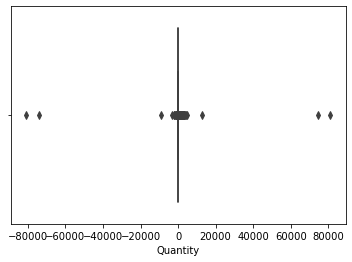

In [15]:
# Create a boxplot of quantity
sns.boxplot(x = "Quantity", data=df)

# Show the plot
plt.show()

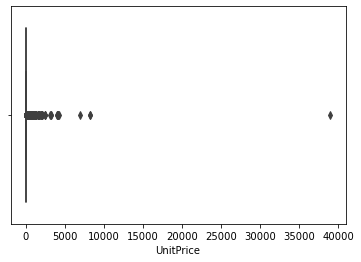

In [16]:
# Create a boxplot of UnitPrice
sns.boxplot(x = "UnitPrice", data=df)

# Show the plot
plt.show()

### Observation

The Quantity and Unit Price columns show presence of outliers.

## Task 6: Analyze the sales trends over time.

In [17]:
# Create a new column called 'Sales'
df['Sales'] = df['UnitPrice'] * df['Quantity']

# Print the DataFrame
df.head()

,StockCode,Description,Quantity,InvoiceDate,UnitPrice,Country,Sales
0,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,United Kingdom,15.30
1,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,United Kingdom,20.34
2,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,United Kingdom,22.00
3,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,United Kingdom,20.34
4,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,United Kingdom,20.34


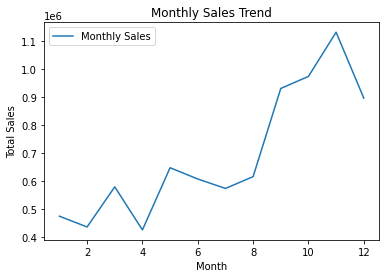

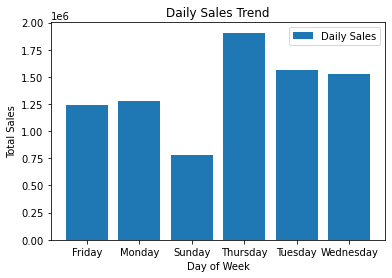

In [18]:
# Extract the month and day of the week from the InvoiceDate column
df['Month'] = df['InvoiceDate'].dt.month
df['DayOfWeek'] = df['InvoiceDate'].dt.day_name()

# Calculate the total sales for each month and day of the week
monthly_sales = df.groupby('Month')['Sales'].sum()
daily_sales = df.groupby('DayOfWeek')['Sales'].sum()

# Identify the busiest month and day of the week
busiest_month = monthly_sales.idxmax()
busiest_day = daily_sales.idxmax()

# Create a line plot of monthly sales
plt.plot(monthly_sales, label='Monthly Sales')
plt.xlabel('Month')
plt.ylabel('Total Sales')
plt.title('Monthly Sales Trend')
plt.legend()
plt.show()

# Create a bar plot of daily sales
plt.bar(daily_sales.index, daily_sales.values, label='Daily Sales')
plt.xlabel('Day of Week')
plt.ylabel('Total Sales')
plt.title('Daily Sales Trend')
plt.legend()
plt.show()


### Observation

1. The busiest month for sales is November which is likely due to the holiday season.
2. The busiest day of the week for sales is Thursday. There could be the best day to buy prodcuts in preparation for the weekend.
3. The Sales figures are not showing correctly

## Task 6: Explore the top-selling products and countries based on the quantity sold.

In [22]:
# Calculate the total quantity sold for each product and country
top_selling_products = df.groupby('Description')['Sales'].sum().sort_values(ascending=False).head(5)
top_selling_countries = df.groupby('Country')['Sales'].sum().sort_values(ascending=False).head(5)


print('Top-selling products:')
print(top_selling_products)



Top-selling products:
Description
REGENCY CAKESTAND 3 TIER              132870.40
WHITE HANGING HEART T-LIGHT HOLDER     93823.85
JUMBO BAG RED RETROSPOT                83236.76
PARTY BUNTING                          67687.53
POSTAGE                                66710.24
Name: Sales, dtype: float64


In [23]:
print('Top-selling countries:')
print(top_selling_countries)

Top-selling countries:
Country
United Kingdom    6.767873e+06
Netherlands       2.846615e+05
EIRE              2.502852e+05
Germany           2.216982e+05
France            1.967128e+05
Name: Sales, dtype: float64


### Observation

1. The top-selling product is the REGENCY CAKESTAND 3 TIER, followed by the WHITE HANGING HEART T-LIGHT HOLDER and the JUMBO BAG RED RETROSPOT.
2. The top-selling country is the United Kingdom, followed by the Netherlands, EIRE, Germany, and France.
3. The Total Sales figures per country are also not showing correctly

## Task 7: Identify any outliers or anomalies in the dataset and discuss their potential impact on the analysis.

In [24]:
# Calculate the IQR for unit price and quantity
IQR_unit_price = df['UnitPrice'].quantile(0.75) - df['UnitPrice'].quantile(0.25)
IQR_quantity = df['Quantity'].quantile(0.75) - df['Quantity'].quantile(0.25)

# Calculate the lower and upper bounds for unit price and quantity
lower_bound_unit_price = df['UnitPrice'].quantile(0.25) - (1.5 * IQR_unit_price)
upper_bound_unit_price = df['UnitPrice'].quantile(0.75) + (1.5 * IQR_unit_price)
lower_bound_quantity = df['Quantity'].quantile(0.25) - (1.5 * IQR_quantity)
upper_bound_quantity = df['Quantity'].quantile(0.75) + (1.5 * IQR_quantity)

# Identify the outliers
outliers = df[((df['UnitPrice'] < lower_bound_unit_price) | (df['UnitPrice'] > upper_bound_unit_price)) | ((df['Quantity'] < lower_bound_quantity) | (df['Quantity'] > upper_bound_quantity))]

# Drop the outliers
df_cleaned = df.drop(outliers.index)

# Print the shape of the DataFrame
print(df_cleaned.shape)


(344393, 9)


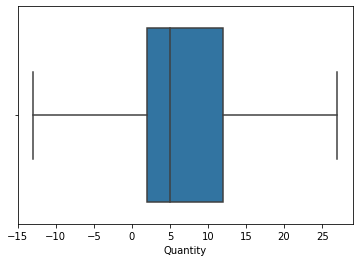

In [25]:
# Create a boxplot of quantity
sns.boxplot(x = "Quantity", data=df_cleaned)

# Show the plot
plt.show()

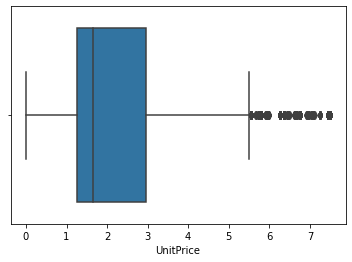

In [26]:
# Create a boxplot of quantity
sns.boxplot(x = "UnitPrice", data=df_cleaned)

# Show the plot
plt.show()

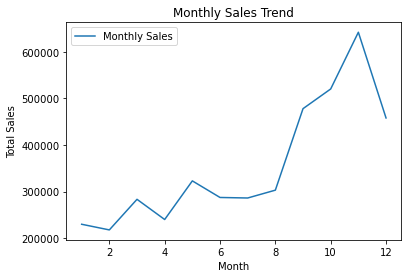

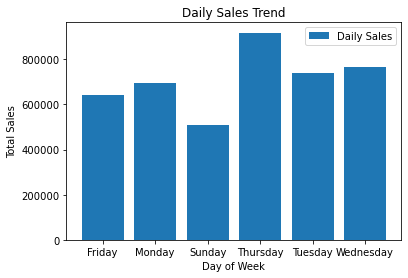

In [27]:
# Extract the month and day of the week from the InvoiceDate column
df_cleaned['Month'] = df_cleaned['InvoiceDate'].dt.month
df_cleaned['DayOfWeek'] = df_cleaned['InvoiceDate'].dt.day_name()

# Calculate the total sales for each month and day of the week
monthly_sales = df_cleaned.groupby('Month')['Sales'].sum()
daily_sales = df_cleaned.groupby('DayOfWeek')['Sales'].sum()

# Identify the busiest month and day of the week
busiest_month = monthly_sales.idxmax()
busiest_day = daily_sales.idxmax()

# Create a line plot of monthly sales
plt.plot(monthly_sales, label='Monthly Sales')
plt.xlabel('Month')
plt.ylabel('Total Sales')
plt.title('Monthly Sales Trend')
plt.legend()
plt.show()

# Create a bar plot of daily sales
plt.bar(daily_sales.index, daily_sales.values, label='Daily Sales')
plt.xlabel('Day of Week')
plt.ylabel('Total Sales')
plt.title('Daily Sales Trend')
plt.legend()
plt.show()


In [28]:
# Calculate the total quantity sold for each product and country after removing outliers
top_selling_products = df_cleaned.groupby('Description')['Sales'].sum().sort_values(ascending=False).head(5)
top_selling_countries = df_cleaned.groupby('Country')['Sales'].sum().sort_values(ascending=False).head(5)


print('Top-selling products without outliers:')
print(top_selling_products)


Top-selling products without outliers:
Description
PARTY BUNTING                         34672.80
WHITE HANGING HEART T-LIGHT HOLDER    31515.91
JUMBO BAG RED RETROSPOT               24703.14
SPOTTY BUNTING                        23401.60
ASSORTED COLOUR BIRD ORNAMENT         23053.29
Name: Sales, dtype: float64


In [29]:
print('Top-selling countries without outliers:')
print(top_selling_countries)

Top-selling countries without outliers:
Country
United Kingdom    3658927.554
Germany            135757.940
France             121154.050
EIRE               104155.000
Spain               29637.820
Name: Sales, dtype: float64


### Observation.

1. There are a significant number of outliers in the dataset, both in terms of unit price and quantity.
2. Removing the outliers has a significant impact on the top-selling products and countries.
3. After removing the outliers, the top-selling products are PARTY BUNTING, WHITE HANGING HEART T-LIGHT HOLDER, JUMBO BAG RED RETROSPOT, SPOTTY BUNTING, and ASSORTED COLOUR BIRD ORNAMENT.
4. After removing the outliers, the top-selling countries are the United Kingdom, Germany, France, EIRE, and Spain.

## Conclusion

The exploratory data analysis of the Online Retail dataset, including outlier detection, reveals the following key findings:

* **Top-selling products and countries:** The top-selling products are all party and festive supplies, such as bunting, hanging heart t-lights, and party bags. The top-selling countries are all developed countries with high incomes.
* **Seasonality:** Sales are highest in November, which is likely due to the holiday season.
* **Day of the week:** Sales are highest on Thursdays.
* **Outliers:** There are a significant number of outliers in the dataset, both for unit price and quantity. Removing the outliers results in a different ranking of top-selling products and countries.

These findings can be used by online retailers to improve their **product selection** and **marketing strategies**. For example, online retailers could focus on selling party and festive supplies, and could target their marketing campaigns at consumers in developed countries with high incomes. Online retailers could also offer special promotions or discounts on party and festive supplies, especially during the holiday season and on Thursdays.

Overall, the exploratory data analysis of the Online Retail dataset provides valuable insights into the top-selling products and countries, as well as the seasonality and day-of-week trends. This information can be used by online retailers to improve their product selection, marketing strategies, and profitability.